# CAPSTONE PROJECT 
## BATTLE FOR INDIAN CITIES
### APPLIED DATA SCIENCE CAPSTONE BY IBM/COURSERA

## Table of contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Methodology](#methodology)
* [4. Examine Cluster](#examine)
* [5. Results and Discussion](#results)
* [6. Conclusion](#conclusion)

## 1. INTRODUCTION: BUSINESS PROBLEM <a name="introduction"></a>

India is the second most populous country in the world. The sheer number of people living here tempts each and every consumer goods companies to initiate or expand(for those who are already established in some part of the nation) their businesses in India. Since, india is a large nation with a wide range of diversity among its people, places and lifestyles, the companies who wish to LAUNCH their business and distribution of CONSUMER GOODS can have a hard time figuring out which parts of the nation is most likely to welcome their particular consumer-based goods. 

In this project we will try to find the optimal location among major cities of india for the initial launch of any specific CONSUMER GOODS products. This will also be helpful for already established companies who wish to expand their business to
other cities of India, and do not have enough data to figure out which newer cities are more likely to welcome their PRODUCT A and which will be the best site for their PRODUCT B and so on.

This project categorizes the major cities with similar characteristics into clusters and helps the companies based on CPG (Consumer Packed Goods) and FMCG (Fast-Moving Consumer Goods), to plan for the deployment and distribution of
their products and efficiently target different cities corresponding to their different products. 

## 2. DATA <a name="data"></a>

Based on the description of our problem, we will be needing a list of major cities
(according to the population and various other characteristics) for this project. The
population data, literacy rate, density per sq. km and sex-ratio are some of the main
data that we need to group the cities into clusters of similar cities. I got these from
the link below:

https://www.nriol.com/india-statistics/biggest-cities-india.asp

The coordinates (latitudes and longitudes) for each of these major cities were
required in order to get the nearby venues so that we could group these cities
into clusters based on the type of venues in the vicinity of the cities.
 geopy is a Python client for several popular geocoding web
services. geopy helped me locate the coordinates of the cities using
geocoders.
Further data regarding nearby venues was gathered using the foursquare
API. Different cities vary greatly in their size and lifestyle. So, I set the
RADIUS of 10 km and limit of 1000 so that I won't miss out anything.

https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, LATITUDE, LONGITUDE, RADIUS, LIMIT)

<!-- ### FEATURE SELECTION

https://www.nriol.com/india-statistics/biggest-cities-india.asp

After acquiring and cleaning the data, we were left with a dataframe consisting of
100 rows and 8 columns. On further analysis of each column’s relevance to our
project, it was clear that some features were redundant and needed to be
removed from the dataframe. For example, the ‘Indian States’ and the ‘Main
Language’ columns are not really significant to our purpose.

https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, LATITUDE,
LONGITUDE, RADIUS, LIMIT)

Foursquare API’s response is saved in the form of a json file which contains a lot
of unwanted data. We need to be very careful in filtering out what we need. For
example, first we need to convert (APIRESPONSE['response']['groups'][0]['items'])
into a dataframe. Further, we need to drop all other columns except the following
columns: -
'venue.name','venue.categories','venue.location.lat','venue.location.lng'.  -->

###  IMPORTING & INSTALLING THE REQUIRED LIBRARIES

In [253]:
import pandas as pd
import numpy as np
import folium 
import matplotlib as mpl
import matplotlib.pyplot as plt

import requests

from pandas import json_normalize

from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors

pd.set_option('display.max_columns', None)

from sklearn import preprocessing # for normalizing the data in a dataframe

We need lxml, html5 and beautifulsoup4 for web scraping

Although we will be using only pandas here for getting the tables from the webpages

In [201]:
!pip install lxml html5lib beautifulsoup4

You should consider upgrading via the 'f:\anaconda\python.exe -m pip install --upgrade pip' command.


Let's get all the tables present on this webpage 

In [202]:
url_major_cities='https://www.nriol.com/india-statistics/biggest-cities-india.asp'
list_major_cities=pd.read_html(url_major_cities)
len(list_major_cities)

1

## 3. METHODOLOGY <a name="methodology"></a>

Since the read_html query returned a single element list. It means that there are no other unwanted tables on this webpage.

In [203]:
df_major_cities=list_major_cities[0]
df_major_cities

,Serial no.,Indian Cities,Indian States,Population,Density(/km2),Literacy,*Sex Ratio,Main Language
0,1,Mumbai,Maharashtra,12478447.0,22937.0,90.28%,852,Marathi
1,2,Delhi,Delhi,16753235.0,11297.0,86.34%,875,Hindi
2,3,Bangalore,Karnataka,8425970.0,4378.0,89%,914,Kannada
3,4,Hyderabad,Telangana,6809970.0,18480.0,82.96%,945,Telugu
4,5,Ahmedabad,Gujarat,5570585.0,12000.0,89.62%,897,Gujarati
...,...,...,...,...,...,...,...,...
95,96,Malegoan,Maharashtra,471006.0,NaN,86.66 %,969,"Hindi , Marathi , Urdu"
96,97,Gaya,Bihar,463454.0,880.0,85.74%,886,Hindi
97,98,Jalgaon,Maharashtra,460468.0,6800.0,88.96%,909,Marathi
98,99,Udaipur,Rajasthan,451735.0,242.0,90.66%,925,Hindi and Mewari


We can change our 'Serial no.' column into the index column.

In [204]:
df_major_cities.set_index(keys='Serial no.',inplace=True)
df_major_cities

,Indian Cities,Indian States,Population,Density(/km2),Literacy,*Sex Ratio,Main Language
Serial no.,,,,,,,
1,Mumbai,Maharashtra,12478447.0,22937.0,90.28%,852,Marathi
2,Delhi,Delhi,16753235.0,11297.0,86.34%,875,Hindi
3,Bangalore,Karnataka,8425970.0,4378.0,89%,914,Kannada
4,Hyderabad,Telangana,6809970.0,18480.0,82.96%,945,Telugu
5,Ahmedabad,Gujarat,5570585.0,12000.0,89.62%,897,Gujarati
...,...,...,...,...,...,...,...
96,Malegoan,Maharashtra,471006.0,NaN,86.66 %,969,"Hindi , Marathi , Urdu"
97,Gaya,Bihar,463454.0,880.0,85.74%,886,Hindi
98,Jalgaon,Maharashtra,460468.0,6800.0,88.96%,909,Marathi


Our table contains 100 rows and 8 columns. On further analysis of each column’s relevance to our project, it is clear that some features are redundant and need to be removed from this dataframe. For example, the ‘Indian States’ and the ‘Main
Language’ columns are not really significant to our purpose.

In [205]:
df_major_cities.drop(labels=['Indian States','Main Language'],axis=1,inplace=True)
df_major_cities

,Indian Cities,Population,Density(/km2),Literacy,*Sex Ratio
Serial no.,,,,,
1,Mumbai,12478447.0,22937.0,90.28%,852
2,Delhi,16753235.0,11297.0,86.34%,875
3,Bangalore,8425970.0,4378.0,89%,914
4,Hyderabad,6809970.0,18480.0,82.96%,945
5,Ahmedabad,5570585.0,12000.0,89.62%,897
...,...,...,...,...,...
96,Malegoan,471006.0,NaN,86.66 %,969
97,Gaya,463454.0,880.0,85.74%,886
98,Jalgaon,460468.0,6800.0,88.96%,909


Let's add some other important data for each of these cities using an other dataframe(cities_r2.csv) that we found on kaggle.

https://www.kaggle.com/zed9941/top-500-indian-cities


In [206]:
df_cities_r2=pd.read_csv('cities_r2.csv')
df_cities_r2

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,169461,89155,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,475247,258111,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,90091,46752,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,166419,92164,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


Let's select each city from the df_major_cities and get all the appropriate data that we can, from the second dataframe i.e. df_cities_r2 dataframe.

Moving on, we find that we also need to strip the names of the cities otherwise the city names from both of the dataframe will not match.

In [207]:
series_cities=df_cities_r2['name_of_city']
list_cities=list(series_cities)
for i in range(len(list_cities)):
    list_cities[i]=list_cities[i].strip()

Now, let's find out how many of the cities from the 1st dataframe(df_major_cities) are present in the 2nd(df_cities_r2) dataframe.

In [208]:
count=0
for i in df_major_cities['Indian Cities']:
#     print(type(i),i)
    if i in list_cities:
#         print('found')
        count=count+1
count

87

On further manual checking, we find that some cities are spelled differently ans some contain an alternate version of their many known names.

This force us to manually alter the corresponding csv file(cities_r2.csv) of the second dataframe(df_cities_r2) using Microsoft Excel and then read it again for further analysis.

Two of the cities were completely missing from the csv file(cities_r2.csv). So, I extracted the required data for them from the following links:

Kalyan & Dombivali, Maharashtra: -

https://www.census2011.co.in/census/city/369-kalyan-and-dombivali.html

Ghaziabad, Uttar Pradesh: -

https://www.census2011.co.in/census/district/511-ghaziabad.html

In [209]:
df_major_cities.tail()
df_major_cities.loc[96,'Indian Cities']='Malegaon'
df_major_cities.tail()

,Indian Cities,Population,Density(/km2),Literacy,*Sex Ratio
Serial no.,,,,,
96,Malegaon,471006.0,NaN,86.66 %,969
97,Gaya,463454.0,880.0,85.74%,886
98,Jalgaon,460468.0,6800.0,88.96%,909
99,Udaipur,451735.0,242.0,90.66%,925
100,Maheshtala,449423.0,NaN,82.63 %,945


In [210]:
df_cities_r3=pd.read_csv('cities_r3.csv')
series_cities=df_cities_r3['name_of_city']
list_cities=list(series_cities)
for i in range(len(list_cities)):
    list_cities[i]=list_cities[i].strip()
count=0
for i in df_major_cities['Indian Cities']:
#     print(type(i),i)
    if i in list_cities:
#         print('found')
        count=count+1
count

100

Now let's merge both dataframes into one.

In [211]:
# df_cities_r3['Indian Cities']=df_cities_r3['name_of_city']
df_cities_r3.insert(0,'Indian Cities',df_major_cities['Indian Cities'])
df_cities_r3.drop(labels='name_of_city',axis=1,inplace=True)
print(df_cities_r3.shape)
df_cities_r3.head()

(494, 22)


,Indian Cities,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,NaN,27,MAHARASHTRA,NaN,1247327,649626,597701,121122,63695,57427,1029041,549217,479824,920,902,91.37,93.73,88.81,"19.209444,73.093969",88630,52690,35940
1,Mumbai,9,UTTAR PRADESH,NaN,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,"28.669274,75.453847",250500,150435,100065
2,Delhi,27,MAHARASHTRA,7.0,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
3,Bangalore,28,ANDHRA PRADESH,1.0,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
4,Hyderabad,20,JHARKHAND,24.0,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036


In [212]:
print(df_major_cities.shape)
df_major_cities.head()

(100, 5)


,Indian Cities,Population,Density(/km2),Literacy,*Sex Ratio
Serial no.,,,,,
1,Mumbai,12478447.0,22937.0,90.28%,852
2,Delhi,16753235.0,11297.0,86.34%,875
3,Bangalore,8425970.0,4378.0,89%,914
4,Hyderabad,6809970.0,18480.0,82.96%,945
5,Ahmedabad,5570585.0,12000.0,89.62%,897


In [213]:
df_merged=pd.merge(df_major_cities,df_cities_r3,on='Indian Cities')
print(df_merged.shape)
df_merged.head()

(100, 26)


,Indian Cities,Population,Density(/km2),Literacy,*Sex Ratio,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Mumbai,12478447.0,22937.0,90.28%,852,9,UTTAR PRADESH,NaN,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,"28.669274,75.453847",250500,150435,100065
1,Delhi,16753235.0,11297.0,86.34%,875,27,MAHARASHTRA,7.0,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Bangalore,8425970.0,4378.0,89%,914,28,ANDHRA PRADESH,1.0,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Hyderabad,6809970.0,18480.0,82.96%,945,20,JHARKHAND,24.0,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Ahmedabad,5570585.0,12000.0,89.62%,897,28,ANDHRA PRADESH,21.0,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


Let's remove the redundant data from our table.

In [214]:
list_redundant=['state_code','state_name','dist_code','Population','*Sex Ratio','Literacy','location']
df_merged.drop(labels=list_redundant,axis=1,inplace=True)
print(df_merged.shape)
df_merged.head()

(100, 19)


,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
0,Mumbai,22937.0,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065
1,Delhi,11297.0,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,8863,5269,3594
2,Bangalore,4378.0,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,10565,6797,3768
3,Hyderabad,18480.0,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,19225,12189,7036
4,Ahmedabad,12000.0,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,11902,7871,4031


### Now let's use geopy for finding the coordinates of each of the cities.

In [215]:
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ascyrax")

You should consider upgrading via the 'f:\anaconda\python.exe -m pip install --upgrade pip' command.


Let us define a function which will do all the heavylifting for us. We just need to call this function and it will return the latitude and longitude of the cities.

In [216]:
def get_lat_lon(city_name):
    ll=geolocator.geocode(city_name)
#     print(city_name)
#     print(type(ll),ll)
    lat=ll[1][0]
    lon=ll[1][1]
#     print(lat,lon)
    return lat,lon

In [79]:
list_ll=[get_lat_lon(city_name+','+' India') for city_name in df_merged.loc[:,'Indian Cities']]

In [217]:
lat=[]
lon=[]
for ll in list_ll:
    lat.append(ll[0])
    lon.append(ll[1])
df_merged['Latitude']=lat
df_merged['Longitude']=lon

Let us visualize the data that we have so far.

In [218]:
print(df_merged.shape)
df_merged.head()

(100, 21)


,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
0,Mumbai,22937.0,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065,19.075990,72.877393
1,Delhi,11297.0,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,8863,5269,3594,28.651718,77.221939
2,Bangalore,4378.0,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,10565,6797,3768,12.979120,77.591300
3,Hyderabad,18480.0,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,19225,12189,7036,17.388786,78.461065
4,Ahmedabad,12000.0,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,11902,7871,4031,23.021624,72.579707


## Lets find if any column contains a NaN 

In [219]:
(df_merged.isnull()==True).any()

Indian Cities                     False
Density(/km2)                      True
population_total                  False
population_male                   False
population_female                 False
0-6_population_total              False
0-6_population_male               False
0-6_population_female             False
literates_total                   False
literates_male                    False
literates_female                  False
sex_ratio                         False
child_sex_ratio                   False
effective_literacy_rate_total     False
effective_literacy_rate_male      False
effective_literacy_rate_female    False
total_graduates                   False
male_graduates                    False
female_graduates                  False
Latitude                          False
Longitude                         False
dtype: bool

We can see that the 95th and the 99th element of the column 'Density(/km2)' has NaN values.

In [220]:
df_merged.tail()

,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
95,Malegaon,NaN,146237,75655,70582,19580,10626,8954,112171,61135,51036,933,843,88.56,94.01,82.81,19030,12252,6778,20.259399,76.976203
96,Gaya,880.0,211944,109435,102509,25077,13103,11974,163781,89472,74309,937,914,87.65,92.88,82.08,25910,16824,9086,24.796436,85.007956
97,Jalgaon,6800.0,218323,111363,106960,12786,6500,6286,185885,97604,88281,960,967,90.44,93.08,87.69,65863,35756,30107,20.843512,75.525927
98,Udaipur,242.0,296889,154915,141974,43646,22758,20888,189420,110247,79173,916,918,74.80,83.42,65.39,28092,20487,7605,24.578721,73.686257
99,Maheshtala,NaN,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910,22.508621,88.253218


This implies that only one column contains NaN values. Now let us replace the NaN values by the mean of the values present in that column.

In [221]:
df_merged['Density(/km2)'].fillna(df_merged['Density(/km2)'].mean(),inplace=True)

Now they have been replaced by the mean of the values in this column.

In [222]:
df_merged.tail()

,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
95,Malegaon,5508.097625,146237,75655,70582,19580,10626,8954,112171,61135,51036,933,843,88.56,94.01,82.81,19030,12252,6778,20.259399,76.976203
96,Gaya,880.000000,211944,109435,102509,25077,13103,11974,163781,89472,74309,937,914,87.65,92.88,82.08,25910,16824,9086,24.796436,85.007956
97,Jalgaon,6800.000000,218323,111363,106960,12786,6500,6286,185885,97604,88281,960,967,90.44,93.08,87.69,65863,35756,30107,20.843512,75.525927
98,Udaipur,242.000000,296889,154915,141974,43646,22758,20888,189420,110247,79173,916,918,74.80,83.42,65.39,28092,20487,7605,24.578721,73.686257
99,Maheshtala,5508.097625,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910,22.508621,88.253218


# Premature Clustring of Cities
Let us prematurely cluster our cities just for fun :)

## WE WILL BE USING K-MEANS MACHINE LEARNING TECHNIQUE.
The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.You can use the k-means algorithm to maximise the similarity of data points within clusters and minimise the similarity of points in different clusters. Hence, it is the most suitable algorithm to use here as we are trying to group a number of cities according to their similarities.

In [223]:
n_clusters=6
kmeans=KMeans(n_clusters).fit(df_merged.iloc[:,1:])
kmeans.labels_

array([4, 0, 0, 0, 0, 5, 3, 1, 0, 0, 5, 0, 5, 0, 0, 5, 3, 0, 0, 0, 0, 5,
       0, 0, 5, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 5, 2, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 0, 0, 0,
       0, 5, 0, 3, 5, 0, 0, 0, 0, 0, 0, 0])

In [224]:
df_merged.insert(0,'Cluster Labels',kmeans.labels_)

In [225]:
df_merged.head()

,Cluster Labels,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
0,4,Mumbai,22937.0,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065,19.075990,72.877393
1,0,Delhi,11297.0,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,8863,5269,3594,28.651718,77.221939
2,0,Bangalore,4378.0,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,10565,6797,3768,12.979120,77.591300
3,0,Hyderabad,18480.0,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,19225,12189,7036,17.388786,78.461065
4,0,Ahmedabad,12000.0,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,11902,7871,4031,23.021624,72.579707


In [226]:
# create map
latitude=20.5937
longitude=78.9629
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'],df_merged['Longitude'], df_merged['Indian Cities'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + '(Cluster ' + str(cluster)+')', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now let us drop the 'Cluster Labels' column since we do not need it anymore. Moreover, it will only be a nuisance for any of the further analyses.

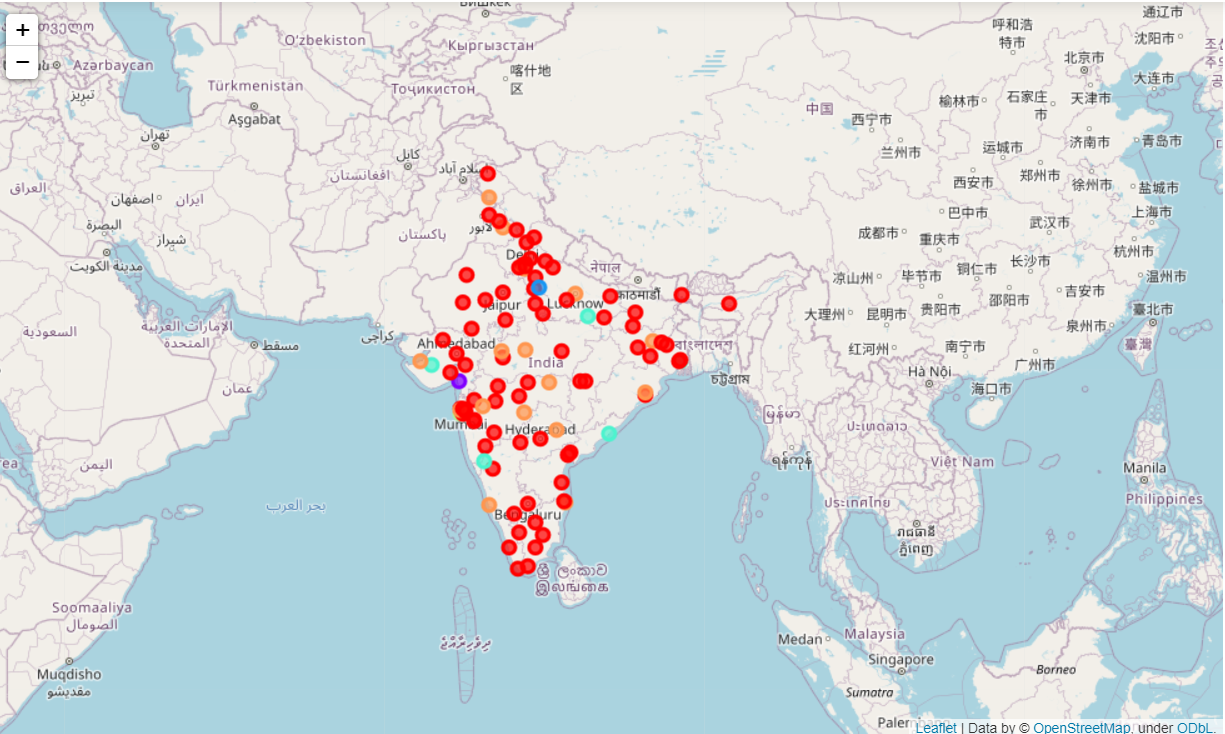

In [356]:
from IPython.display import Image
Image(filename='map1.png',width='800',height='500')

In [227]:
df_merged.drop(axis=1,labels='Cluster Labels',inplace=True)
print(df_merged.shape)
df_merged.head()

(100, 21)


,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
0,Mumbai,22937.0,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065,19.075990,72.877393
1,Delhi,11297.0,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,8863,5269,3594,28.651718,77.221939
2,Bangalore,4378.0,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,10565,6797,3768,12.979120,77.591300
3,Hyderabad,18480.0,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,19225,12189,7036,17.388786,78.461065
4,Ahmedabad,12000.0,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,11902,7871,4031,23.021624,72.579707


## EXPLORE THE INDIAN CITIES
### FOURSQUARE API 
It is time for foursquare API to come to the rescue and provide us with the data of the venues surrounding the city.

For this we will be needing only the coordinates of the cities.

Let us define a function which can be applied to a dataframe in order to extract the category of each venue from its corresponding element of 'venue.categories' column present in that row.

In [228]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We will need the following credentials in order to use the foursquare API. 

In [229]:
CLIENT_ID = 'S01X3E5GTFLE31LD3QX2LNR2TSY0XIIE5DYXOUOR1OMEHXBH' # your Foursquare ID
CLIENT_SECRET = 'B2QL1LH3NAM2LG0SQTXDJSY1EUOG4REZRT2TZUKA1ZNGZX1T' # your Foursquare Secret

Let us set a RADIUS & LIMIT according to the sizes of the cities.

In [242]:
VERSION = '20211030' # Foursquare API version
RADIUS=7000 # 7 km
LIMIT=1000 #query limit

Using the Python requests module we can send HTTP requests. We have already imported it and we will be using it here.

We will be using the json_normalize module from pandas inorder to normalize the semi-structured JSON data into flat tables.

The data for all the venues obtained from the requests using Foursquare API is stored in df_venues for further analyses.

In [233]:
cities=df_merged['Indian Cities']
lat=df_merged['Latitude']
lon=df_merged['Longitude']


# df_venues=pd.DataFrame()
df_venues=pd.DataFrame(columns=['Indian Cities','Latitude','Longitude','venue.name','venue.categories','venue.location.lat',\
                                'venue.location.lng'])

# df_none=pd.DataFrame(columns=['Indian Cities','Latitude','Longitude','venue.name','venue.categories','venue.location.lat',\
#                                 'venue.location.lng'])



for i in range(len(cities)):
    print(i,' ',cities.iloc[i])
    r=requests.get('https://api.foursquare.com/v2/venues/explore?\
    &client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    lat.iloc[i],
    lon.iloc[i],
    RADIUS,
    LIMIT
    )).json()
    df_temp=json_normalize(r['response']['groups'][0]['items'])
    req_columns=['venue.name','venue.categories','venue.location.lat','venue.location.lng']
    if df_temp.empty==False:
        df_temp=df_temp[req_columns]
        df_temp['venue.categories']=df_temp.apply(get_category_type,axis=1)
        df_temp[['Indian Cities','Latitude','Longitude']]=cities.iloc[i],lat.iloc[i],lon.iloc[i]
        df_venues=df_venues.append(df_temp)
    else:
        print('None data returned')
    print(df_venues.shape)

0   Mumbai
(100, 7)
1   Delhi
(200, 7)
2   Bangalore
(300, 7)
3   Hyderabad
(400, 7)
4   Ahmedabad
(476, 7)
5   Chennai
(576, 7)
6   Kolkata
(676, 7)
7   Surat
(759, 7)
8   Pune
(859, 7)
9   Jaipur
(959, 7)
10   Lucknow
(1014, 7)
11   Kanpur
(1044, 7)
12   Nagpur
(1112, 7)
13   Indore
(1181, 7)
14   Thane
(1250, 7)
15   Bhopal
(1293, 7)
16   Visakhapatnam
(1353, 7)
17   Pimpri & Chinchwad
(1419, 7)
18   Patna
(1443, 7)
19   Vadodara
(1543, 7)
20   Ghaziabad
(1557, 7)
21   Ludhiana
(1606, 7)
22   Agra
(1670, 7)
23   Nashik
(1709, 7)
24   Faridabad
(1733, 7)
25   Meerut
(1740, 7)
26   Rajkot
(1780, 7)
27   Kalyan & Dombivali
(1828, 7)
28   Vasai Virar
(1874, 7)
29   Varanasi
(1921, 7)
30   Srinagar
(1944, 7)
31   Aurangabad
(1973, 7)
32   Dhanbad
(1978, 7)
33   Amritsar
(2023, 7)
34   Navi Mumbai
(2123, 7)
35   Allahabad
(2139, 7)
36   Ranchi
(2150, 7)
37   Haora
(2210, 7)
38   Coimbatore
(2274, 7)
39   Jabalpur
(2282, 7)
40   Gwalior
(2291, 7)
41   Vijayawada
(2352, 7)
42   Jodhpur
(240

The above cell's output shows that we get None value for two cities, namely, Amravati(row index 66) & Jalgaon(row index 97).
So, let us drop these two rows from our df_merged dataframe.

In [232]:
df_merged.drop(axis=0,labels=[66,97],inplace=True)

In [243]:
df_merged.tail()

,Cluster Labels,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
94,6,Tirunelveli,4370.000000,187750,96655,91095,19440,10496,8944,152103,81544,70559,942,852,90.37,94.64,85.89,19815,11257,8558,8.701220,77.579269
95,2,Malegaon,5508.097625,146237,75655,70582,19580,10626,8954,112171,61135,51036,933,843,88.56,94.01,82.81,19030,12252,6778,20.259399,76.976203
96,0,Gaya,880.000000,211944,109435,102509,25077,13103,11974,163781,89472,74309,937,914,87.65,92.88,82.08,25910,16824,9086,24.796436,85.007956
98,0,Udaipur,242.000000,296889,154915,141974,43646,22758,20888,189420,110247,79173,916,918,74.80,83.42,65.39,28092,20487,7605,24.578721,73.686257
99,2,Maheshtala,5508.097625,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910,22.508621,88.253218


In [185]:
df_venues.head()

,Indian Cities,Latitude,Longitude,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Mumbai,19.07599,72.877393,Hitchki,Bar,19.069730,72.869761
1,Mumbai,19.07599,72.877393,Sofitel Mumbai BKC,Hotel,19.067448,72.869006
2,Mumbai,19.07599,72.877393,Natural's Ice Cream,Ice Cream Shop,19.077560,72.863035
3,Mumbai,19.07599,72.877393,Trident,Hotel,19.066808,72.867468
4,Mumbai,19.07599,72.877393,PVR Cinemas,Movie Theater,19.086643,72.889839


Let us merge the dataframes df_merged & df_venues into a new dataframe df_final.

In [249]:
df_final=pd.merge(df_venues,df_merged,on='Indian Cities')
df_final

,Indian Cities,Latitude_x,Longitude_x,venue.name,venue.categories,venue.location.lat,venue.location.lng,Cluster Labels,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude_y,Longitude_y
0,Mumbai,19.075990,72.877393,Hitchki,Bar,19.069730,72.869761,6,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065,19.075990,72.877393
1,Mumbai,19.075990,72.877393,Sofitel Mumbai BKC,Hotel,19.067448,72.869006,6,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065,19.075990,72.877393
2,Mumbai,19.075990,72.877393,Natural's Ice Cream,Ice Cream Shop,19.077560,72.863035,6,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065,19.075990,72.877393
3,Mumbai,19.075990,72.877393,Trident,Hotel,19.066808,72.867468,6,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065,19.075990,72.877393
4,Mumbai,19.075990,72.877393,PVR Cinemas,Movie Theater,19.086643,72.889839,6,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065,19.075990,72.877393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,Maheshtala,22.508621,88.253218,Acharya Jagadish Chandra Bose Indian Botanic G...,Botanical Garden,22.558181,88.289223,2,5508.097625,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910,22.508621,88.253218
3706,Maheshtala,22.508621,88.253218,Ajanta Cinema Hall,Movie Theater,22.508116,88.320873,2,5508.097625,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910,22.508621,88.253218
3707,Maheshtala,22.508621,88.253218,Hooghly River,River,22.555290,88.274091,2,5508.097625,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910,22.508621,88.253218
3708,Maheshtala,22.508621,88.253218,Kolkata Port,Harbor / Marina,22.540732,88.302632,2,5508.097625,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910,22.508621,88.253218


Let us remove the unwanted columns from the df_final dataframe, so that we can create a dataframe containing the onehot vector form of all the appropiate columns for our clustering.

In [318]:
df_clean=df_final.drop(labels=['Indian Cities','Latitude_y','Longitude_y','Latitude_x','Longitude_x','venue.location.lat','venue.location.lng','venue.categories','venue.name'],axis=1)
df_clean

,Cluster Labels,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
0,6,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065
1,6,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065
2,6,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065
3,6,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065
4,6,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,2,5508.097625,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910
3706,2,5508.097625,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910
3707,2,5508.097625,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910
3708,2,5508.097625,326360,165122,161238,39134,20482,18652,239631,128615,111016,976,911,83.43,88.92,77.86,37265,24355,12910


### NORMALIZING THE DATA

We will be using the preprocessing module from the sklearn library that we have already imported.

Let us store the column names in a separate list which will be used later to rename the columns of the normalized dataframe.

In [319]:
list_columns=df_clean.columns.values
print(list_columns)

['Cluster Labels' 'Density(/km2)' 'population_total' 'population_male'
 'population_female' '0-6_population_total' '0-6_population_male'
 '0-6_population_female' 'literates_total' 'literates_male'
 'literates_female' 'sex_ratio' 'child_sex_ratio'
 'effective_literacy_rate_total' 'effective_literacy_rate_male'
 'effective_literacy_rate_female' 'total_graduates' 'male_graduates'
 'female_graduates']
<class 'numpy.ndarray'> (3710, 19)
<class 'pandas.core.frame.DataFrame'> (3710, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.857143,0.955280,0.550277,0.560359,0.539681,0.787834,0.826376,0.746813,0.456361,0.489406,0.417524,0.481383,0.188862,0.456334,0.561176,0.399832,0.155445,0.163072,0.145314
1,0.857143,0.955280,0.550277,0.560359,0.539681,0.787834,0.826376,0.746813,0.456361,0.489406,0.417524,0.481383,0.188862,0.456334,0.561176,0.399832,0.155445,0.163072,0.145314
2,0.857143,0.955280,0.550277,0.560359,0.539681,0.787834,0.826376,0.746813,0.456361,0.489406,0.417524,0.481383,0.188862,0.456334,0.561176,0.399832,0.155445,0.163072,0.145314
3,0.857143,0.955280,0.550277,0.560359,0.539681,0.787834,0.826376,0.746813,0.456361,0.489406,0.417524,0.481383,0.188862,0.456334,0.561176,0.399832,0.155445,0.163072,0.145314
4,0.857143,0.955280,0.550277,0.560359,0.539681,0.787834,0.826376,0.746813,0.456361,0.489406,0.417524,0.481383,0.188862,0.456334,0.561176,0.399832,0.155445,0.163072,0.145314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,0.285714,0.222049,0.027172,0.026179,0.029177,0.036262,0.037046,0.035427,0.027182,0.025856,0.028740,0.734043,0.336562,0.596905,0.671831,0.569655,0.021117,0.023850,0.017486
3706,0.285714,0.222049,0.027172,0.026179,0.029177,0.036262,0.037046,0.035427,0.027182,0.025856,0.028740,0.734043,0.336562,0.596905,0.671831,0.569655,0.021117,0.023850,0.017486
3707,0.285714,0.222049,0.027172,0.026179,0.029177,0.036262,0.037046,0.035427,0.027182,0.025856,0.028740,0.734043,0.336562,0.596905,0.671831,0.569655,0.021117,0.023850,0.017486
3708,0.285714,0.222049,0.027172,0.026179,0.029177,0.036262,0.037046,0.035427,0.027182,0.025856,0.028740,0.734043,0.336562,0.596905,0.671831,0.569655,0.021117,0.023850,0.017486


We first create a minimum & maximum preprocessor object

In [ ]:
min_max_scaler=preprocessing.MinMaxScaler()

 Run the normalizer on the dataframe using fit_transform

In [ ]:
df_clean=min_max_scaler.fit_transform(df_clean)

Convert the returned numpy array into a Dataframe again

In [ ]:
df_clean=pd.DataFrame(df_clean)
print(type(df_clean),df_clean.shape)
df_clean

Now with the help of stored column names in the list_columns variable, we can reassign the column names to the normalized dataframe.

In [320]:
df_clean.columns=list_columns
df_clean['Indian Cities']=df_final['Indian Cities']
df_clean['venue.categories']=df_final['venue.categories']
# df_clean.set_index(keys='Indian Cities',inplace=True)
df_clean

,Cluster Labels,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Indian Cities,venue.categories
0,0.857143,0.955280,0.550277,0.560359,0.539681,0.787834,0.826376,0.746813,0.456361,0.489406,0.417524,0.481383,0.188862,0.456334,0.561176,0.399832,0.155445,0.163072,0.145314,Mumbai,Bar
1,0.857143,0.955280,0.550277,0.560359,0.539681,0.787834,0.826376,0.746813,0.456361,0.489406,0.417524,0.481383,0.188862,0.456334,0.561176,0.399832,0.155445,0.163072,0.145314,Mumbai,Hotel
2,0.857143,0.955280,0.550277,0.560359,0.539681,0.787834,0.826376,0.746813,0.456361,0.489406,0.417524,0.481383,0.188862,0.456334,0.561176,0.399832,0.155445,0.163072,0.145314,Mumbai,Ice Cream Shop
3,0.857143,0.955280,0.550277,0.560359,0.539681,0.787834,0.826376,0.746813,0.456361,0.489406,0.417524,0.481383,0.188862,0.456334,0.561176,0.399832,0.155445,0.163072,0.145314,Mumbai,Hotel
4,0.857143,0.955280,0.550277,0.560359,0.539681,0.787834,0.826376,0.746813,0.456361,0.489406,0.417524,0.481383,0.188862,0.456334,0.561176,0.399832,0.155445,0.163072,0.145314,Mumbai,Movie Theater
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,0.285714,0.222049,0.027172,0.026179,0.029177,0.036262,0.037046,0.035427,0.027182,0.025856,0.028740,0.734043,0.336562,0.596905,0.671831,0.569655,0.021117,0.023850,0.017486,Maheshtala,Botanical Garden
3706,0.285714,0.222049,0.027172,0.026179,0.029177,0.036262,0.037046,0.035427,0.027182,0.025856,0.028740,0.734043,0.336562,0.596905,0.671831,0.569655,0.021117,0.023850,0.017486,Maheshtala,Movie Theater
3707,0.285714,0.222049,0.027172,0.026179,0.029177,0.036262,0.037046,0.035427,0.027182,0.025856,0.028740,0.734043,0.336562,0.596905,0.671831,0.569655,0.021117,0.023850,0.017486,Maheshtala,River
3708,0.285714,0.222049,0.027172,0.026179,0.029177,0.036262,0.037046,0.035427,0.027182,0.025856,0.028740,0.734043,0.336562,0.596905,0.671831,0.569655,0.021117,0.023850,0.017486,Maheshtala,Harbor / Marina


Let us group the data according to the cities to find out how many venues we have got w.r.t each city.

In [321]:
df_grouped=df_clean.groupby('Indian Cities').count()
df_grouped

,Cluster Labels,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,venue.categories
Indian Cities,,,,,,,,,,,,,,,,,,,,
Agra,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
Ahmedabad,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
Ajmer,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Aligarh,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Allahabad,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Varanasi,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
Vasai Virar,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
Vijayawada,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61


Let us again store the names of the columns which will be used to generate the onehot vector form.

In [322]:
list_columns=list(list_columns[1:])+['venue.categories']

In [323]:
type(list_columns),list_columns

(list,
 ['Density(/km2)',
  'population_total',
  'population_male',
  'population_female',
  '0-6_population_total',
  '0-6_population_male',
  '0-6_population_female',
  'literates_total',
  'literates_male',
  'literates_female',
  'sex_ratio',
  'child_sex_ratio',
  'effective_literacy_rate_total',
  'effective_literacy_rate_male',
  'effective_literacy_rate_female',
  'total_graduates',
  'male_graduates',
  'female_graduates',
  'venue.categories'])

Let us create a dataframe containing the onehot vector form(based on the columns stored in the variable list_columns) in each row. 

In [324]:
df_onehot=pd.get_dummies(df_clean[list_columns])
df_onehot['Indian Cities']=df_clean['Indian Cities']
df_onehot

,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,venue.categories_ATM,venue.categories_Accessories Store,venue.categories_African Restaurant,venue.categories_Airport,venue.categories_Airport Service,venue.categories_Airport Terminal,venue.categories_American Restaurant,venue.categories_Andhra Restaurant,venue.categories_Arcade,venue.categories_Art Gallery,venue.categories_Art Museum,venue.categories_Arts & Crafts Store,venue.categories_Asian Restaurant,venue.categories_Athletics & Sports,venue.categories_Auto Garage,venue.categories_Awadhi Restaurant,venue.categories_BBQ Joint,venue.categories_Bakery,venue.categories_Bank,venue.categories_Bar,venue.categories_Basketball Court,venue.categories_Beach,venue.categories_Bed & Breakfast,venue.categories_Beer Garden,venue.categories_Bengali Restaurant,venue.categories_Bike Shop,venue.categories_Bistro,venue.categories_Boat or Ferry,venue.categories_Bookstore,venue.categories_Botanical Garden,venue.categories_Boutique,venue.categories_Bowling Alley,venue.categories_Brazilian Restaurant,venue.categories_Breakfast Spot,venue.categories_Brewery,venue.categories_Buffet,venue.categories_Burger Joint,venue.categories_Burrito Place,venue.categories_Bus Station,venue.categories_Bus Stop,venue.categories_Business Service,venue.categories_Cafeteria,venue.categories_Café,venue.categories_Cajun / Creole Restaurant,venue.categories_Canal,venue.categories_Cave,venue.categories_Chaat Place,venue.categories_Chinese Restaurant,venue.categories_Chocolate Shop,venue.categories_City,venue.categories_Clothing Store,venue.categories_Club House,venue.categories_Cocktail Bar,venue.categories_Coffee Shop,venue.categories_Concert Hall,venue.categories_Convenience Store,venue.categories_Cricket Ground,venue.categories_Cuban Restaurant,venue.categories_Cupcake Shop,venue.categories_Dairy Store,venue.categories_Dance Studio,venue.categories_Deli / Bodega,venue.categories_Department Store,venue.categories_Dessert Shop,venue.categories_Dhaba,venue.categories_Dim Sum Restaurant,venue.categories_Diner,venue.categories_Donut Shop,venue.categories_Dumpling Restaurant,venue.categories_Electronics Store,venue.categories_English Restaurant,venue.categories_Event Space,venue.categories_Exhibit,venue.categories_Fabric Shop,venue.categories_Factory,venue.categories_Falafel Restaurant,venue.categories_Farmers Market,venue.categories_Fast Food Restaurant,venue.categories_Field,venue.categories_Fish & Chips Shop,venue.categories_Flea Market,venue.categories_Flower Shop,venue.categories_Food,venue.categories_Food & Drink Shop,venue.categories_Food Court,venue.categories_Food Stand,venue.categories_Food Truck,venue.categories_French Restaurant,venue.categories_Fried Chicken Joint,venue.categories_Frozen Yogurt Shop,venue.categories_Furniture / Home Store,venue.categories_Gaming Cafe,venue.categories_Garden,venue.categories_Gas Station,venue.categories_Gastropub,venue.categories_General College & University,venue.categories_General Entertainment,venue.categories_General Travel,venue.categories_Gift Shop,venue.categories_Goan Restaurant,venue.categories_Golf Course,venue.categories_Gourmet Shop,venue.categories_Grocery Store,venue.categories_Gym,venue.categories_Gym / Fitness Center,venue.categories_Gym Pool,venue.categories_Harbor / Marina,venue.categories_Health & Beauty Service,venue.categories_Heliport,venue.categories_Historic Site,venue.categories_History Museum,venue.categories_Hookah Bar,venue.categories_Hostel,venue.categories_Hot Dog Joint,venue.categories_Hotel,venue.categories_Hotel Bar,venue.categories_Hyderabadi Restaurant,venue.categories_IT Services,venue.categories_Ice Cream Shop,venue.categories_Indian Chinese Restaurant,venue.

Now let us group the cities and take the mean of the onehot values. We are preparing for KMeans analysis.

In [348]:
df_citywise_onehot_mean=df_onehot.groupby('Indian Cities').mean()
print(df_citywise_onehot_mean.shape)
df_citywise_onehot_mean

(98, 258)


,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,venue.categories_ATM,venue.categories_Accessories Store,venue.categories_African Restaurant,venue.categories_Airport,venue.categories_Airport Service,venue.categories_Airport Terminal,venue.categories_American Restaurant,venue.categories_Andhra Restaurant,venue.categories_Arcade,venue.categories_Art Gallery,venue.categories_Art Museum,venue.categories_Arts & Crafts Store,venue.categories_Asian Restaurant,venue.categories_Athletics & Sports,venue.categories_Auto Garage,venue.categories_Awadhi Restaurant,venue.categories_BBQ Joint,venue.categories_Bakery,venue.categories_Bank,venue.categories_Bar,venue.categories_Basketball Court,venue.categories_Beach,venue.categories_Bed & Breakfast,venue.categories_Beer Garden,venue.categories_Bengali Restaurant,venue.categories_Bike Shop,venue.categories_Bistro,venue.categories_Boat or Ferry,venue.categories_Bookstore,venue.categories_Botanical Garden,venue.categories_Boutique,venue.categories_Bowling Alley,venue.categories_Brazilian Restaurant,venue.categories_Breakfast Spot,venue.categories_Brewery,venue.categories_Buffet,venue.categories_Burger Joint,venue.categories_Burrito Place,venue.categories_Bus Station,venue.categories_Bus Stop,venue.categories_Business Service,venue.categories_Cafeteria,venue.categories_Café,venue.categories_Cajun / Creole Restaurant,venue.categories_Canal,venue.categories_Cave,venue.categories_Chaat Place,venue.categories_Chinese Restaurant,venue.categories_Chocolate Shop,venue.categories_City,venue.categories_Clothing Store,venue.categories_Club House,venue.categories_Cocktail Bar,venue.categories_Coffee Shop,venue.categories_Concert Hall,venue.categories_Convenience Store,venue.categories_Cricket Ground,venue.categories_Cuban Restaurant,venue.categories_Cupcake Shop,venue.categories_Dairy Store,venue.categories_Dance Studio,venue.categories_Deli / Bodega,venue.categories_Department Store,venue.categories_Dessert Shop,venue.categories_Dhaba,venue.categories_Dim Sum Restaurant,venue.categories_Diner,venue.categories_Donut Shop,venue.categories_Dumpling Restaurant,venue.categories_Electronics Store,venue.categories_English Restaurant,venue.categories_Event Space,venue.categories_Exhibit,venue.categories_Fabric Shop,venue.categories_Factory,venue.categories_Falafel Restaurant,venue.categories_Farmers Market,venue.categories_Fast Food Restaurant,venue.categories_Field,venue.categories_Fish & Chips Shop,venue.categories_Flea Market,venue.categories_Flower Shop,venue.categories_Food,venue.categories_Food & Drink Shop,venue.categories_Food Court,venue.categories_Food Stand,venue.categories_Food Truck,venue.categories_French Restaurant,venue.categories_Fried Chicken Joint,venue.categories_Frozen Yogurt Shop,venue.categories_Furniture / Home Store,venue.categories_Gaming Cafe,venue.categories_Garden,venue.categories_Gas Station,venue.categories_Gastropub,venue.categories_General College & University,venue.categories_General Entertainment,venue.categories_General Travel,venue.categories_Gift Shop,venue.categories_Goan Restaurant,venue.categories_Golf Course,venue.categories_Gourmet Shop,venue.categories_Grocery Store,venue.categories_Gym,venue.categories_Gym / Fitness Center,venue.categories_Gym Pool,venue.categories_Harbor / Marina,venue.categories_Health & Beauty Service,venue.categories_Heliport,venue.categories_Historic Site,venue.categories_History Museum,venue.categories_Hookah Bar,venue.categories_Hostel,venue.categories_Hot Dog Joint,venue.categories_Hotel,venue.categories_Hotel Bar,venue.categories_Hyderabadi Restaurant,venue.categories_IT Services,venue.categories_Ice Cream Shop,venue.categories_Indian Chinese Restaurant,venue.

Let us take no of cluster=8. 

In [334]:
n_clusters=8
kmeans=KMeans(n_clusters).fit(df_citywise_onehot_mean)
len(kmeans.labels_),kmeans.labels_

(98,
 array([2, 3, 0, 0, 6, 2, 6, 0, 0, 0, 0, 0, 6, 0, 2, 3, 0, 0, 0, 2, 2, 0,
        0, 2, 0, 6, 6, 1, 6, 6, 7, 5, 6, 6, 0, 6, 0, 6, 2, 6, 3, 6, 6, 0,
        0, 0, 5, 6, 3, 0, 0, 0, 3, 2, 2, 6, 6, 3, 0, 6, 6, 2, 3, 6, 4, 0,
        2, 0, 6, 2, 0, 0, 6, 2, 6, 6, 2, 6, 6, 2, 2, 0, 6, 0, 4, 6, 6, 6,
        2, 0, 0, 0, 2, 0, 6, 2, 0, 6]))

Now let us create a dataframe that contains the 'Name of the cities','Latitudes','Longitudes' and 'Cluster Labels'. This will be useful for plotting the city clusters using folium module.

In [336]:
df_merged.insert(0,'Cluster Labels',kmeans.labels_)
df_merged

,Cluster Labels,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
0,2,Mumbai,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065,19.075990,72.877393
1,3,Delhi,11297.000000,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,8863,5269,3594,28.651718,77.221939
2,0,Bangalore,4378.000000,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,10565,6797,3768,12.979120,77.591300
3,0,Hyderabad,18480.000000,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,19225,12189,7036,17.388786,78.461065
4,6,Ahmedabad,12000.000000,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,11902,7871,4031,23.021624,72.579707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,Tirunelveli,4370.000000,187750,96655,91095,19440,10496,8944,152103,81544,70559,942,852,90.37,94.64,85.89,19815,11257,8558,8.701220,77.579269
95,6,Malegaon,5508.097625,146237,75655,70582,19580,10626,8954,112171,61135,51036,933,843,88.56,94.01,82.81,19030,12252,6778,20.259399,76.976203
96,2,Gaya,880.000000,211944,109435,102509,25077,13103,11974,163781,89472,74309,937,914,87.65,92.88,82.08,25910,16824,9086,24.796436,85.007956
98,0,Udaipur,242.000000,296889,154915,141974,43646,22758,20888,189420,110247,79173,916,918,74.80,83.42,65.39,28092,20487,7605,24.578721,73.686257


Folium is a Python library used for visualizing geospatial data. We will be using it to aid us in generatin a map containing all the cities clustered together w.r.t their similarities.

In [337]:
# create map
latitude=20.5937
longitude=78.9629
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'],df_merged['Longitude'], df_merged['Indian Cities'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + '(Cluster ' + str(cluster)+')', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### SUBSTITUTE IMAGE FOR GITHUB

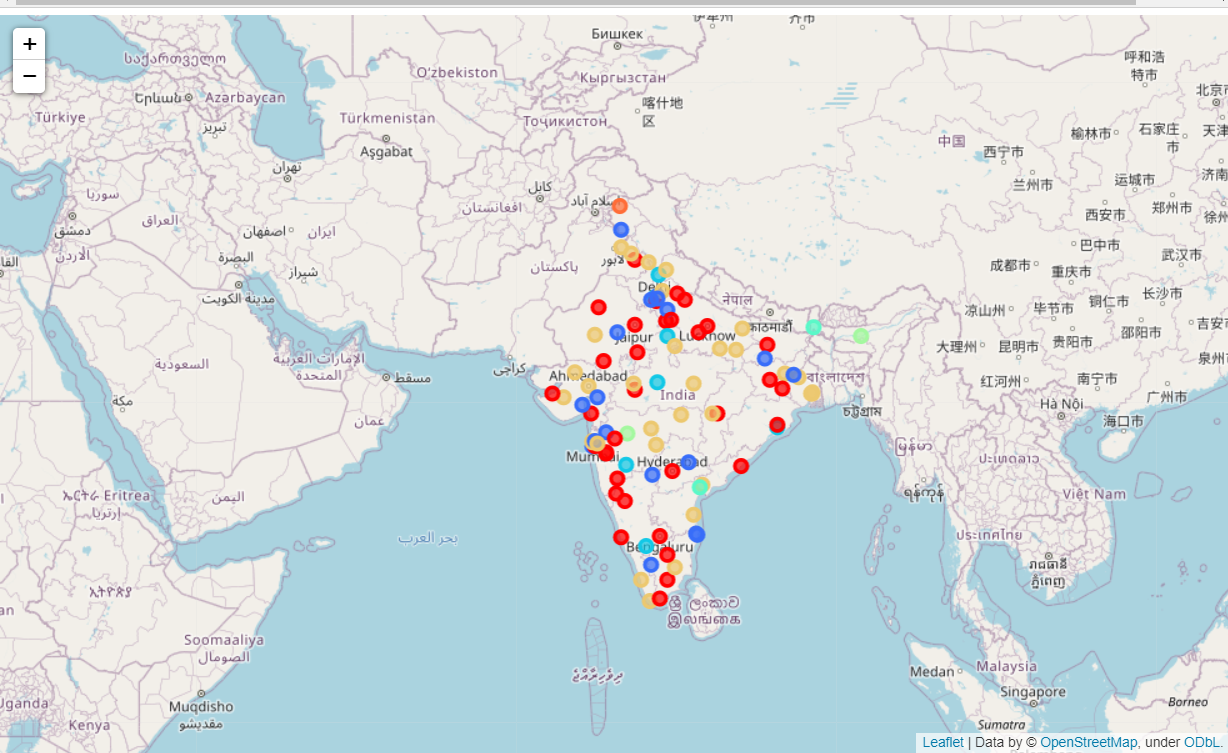

In [353]:
from IPython.display import Image
Image(filename='map2.png',width='800',height='500')

<a id='examine'></a>
# 4. EXAMINE CLUSTERS

## CLUSTER 0

In [338]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[1] + list(range(1, df_merged.shape[1]))]]

,Indian Cities,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
2,Bangalore,Bangalore,4378.000000,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,10565,6797,3768,12.979120,77.591300
3,Hyderabad,Hyderabad,18480.000000,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,19225,12189,7036,17.388786,78.461065
7,Surat,Surat,14000.000000,5570585,2935869,2634716,589076,317917,271159,4464303,2459823,2004480,897,853,89.62,93.96,84.81,769858,435267,334591,21.186461,72.808128
8,Pune,Pune,603.000000,350905,179755,171150,36712,19748,16964,287468,152819,134649,952,859,91.49,95.51,87.33,51661,29832,21829,18.521428,73.854454
9,Jaipur,Jaipur,598.000000,291822,143803,148019,35147,17667,17480,253588,125256,128332,1029,989,98.80,99.30,98.31,26832,14900,11932,26.915458,75.818982
10,Lucknow,Lucknow,690.000000,542580,278786,263794,59437,31547,27890,422913,230586,192327,946,884,87.53,93.26,81.53,77989,42454,35535,26.838100,80.934600
11,Kanpur,Kanpur,1366.000000,111594,57560,54034,14037,7247,6790,75062,42208,32854,939,937,76.94,83.89,69.54,9745,5811,3934,26.460914,80.321759
13,Indore,Indore,3727.000000,164162,82190,81972,14486,7336,7150,142415,72755,69660,997,975,95.15,97.20,93.10,45971,25463,20508,22.720362,75.868200
16,Visakhapatnam,Visakhapatnam,2537.280000,1117094,601363,515731,102556,54660,47896,877590,493181,384409,858,876,86.50,90.21,82.17,233129,138248,94881,17.723128,83.301284
17,Pimpri & Chinchwad,Pimpri & Chinchwad,10000.000000,315310,166900,148410,34576,18862,15714,243634,138737,104897,889,833,86.78,93.72,79.05,58764,35297,23467,18.627929,73.800983


## CLUSTER 1

In [339]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[1] + list(range(1, df_merged.shape[1]))]]

,Indian Cities,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
27,Kalyan & Dombivali,Kalyan & Dombivali,8700.0,197135,102804,94331,26855,13799,13056,108772,60621,48151,918,946,63.88,68.11,59.24,13879,7635,6244,19.233487,73.118246


## CLUSTER 2

In [340]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[1] + list(range(1, df_merged.shape[1]))]]

,Indian Cities,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
0,Mumbai,Mumbai,22937.000000,4681645,2488834,2192811,681231,368162,313069,3123264,1811397,1311867,881,850,78.07,85.42,69.79,250500,150435,100065,19.075990,72.877393
5,Chennai,Chennai,21000.000000,399688,199616,200072,33635,17341,16294,343633,174524,169109,1002,940,93.88,95.75,92.02,52711,30215,22496,13.083694,80.270186
14,Thane,Thane,12000.000000,174164,83888,90276,15434,7934,7500,153269,74454,78815,1076,945,96.56,98.03,95.21,22263,9900,12363,19.194329,72.970178
19,Vadodara,Vadodara,14000.000000,104268,54241,50027,9646,5239,4407,83236,43444,39792,922,841,87.97,88.66,87.22,20618,10689,9929,22.297314,73.194257
20,Ghaziabad,Ghaziabad,1800.000000,254003,133006,120997,27465,14406,13059,201707,111273,90434,910,906,89.04,93.82,83.78,26596,14444,12152,28.711241,77.444537
23,Nashik,Nashik,320.000000,113856,56052,57804,12150,6216,5934,88309,45439,42870,1031,955,86.83,91.18,82.65,7813,5076,2737,20.011247,73.790236
38,Coimbatore,Coimbatore,10052.000000,175516,91695,83821,17194,9096,8098,146259,78910,67349,914,890,92.38,95.53,88.94,25115,13878,11237,11.001812,76.962842
53,Gurgaon,Gurgaon,690.000000,100128,51240,48888,12244,6602,5642,76438,41404,35034,954,855,86.98,92.76,81.01,13852,7837,6015,28.428262,77.002700
54,Aligarh,Aligarh,5508.097625,118157,61360,56797,14845,7842,7003,83879,48209,35670,926,893,81.19,90.08,71.64,11553,7362,4191,27.876990,78.137290
61,Bhiwandi,Bhiwandi,5508.097625,116454,62302,54152,12984,7096,5888,82347,46100,36247,869,830,79.59,83.51,75.10,12665,6213,6452,19.362531,73.078475


## CLUSTER 3

In [341]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[1] + list(range(1, df_merged.shape[1]))]]

,Indian Cities,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
1,Delhi,Delhi,11297.000000,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,8863,5269,3594,28.651718,77.221939
15,Bhopal,Bhopal,230.000000,872575,463123,409452,113658,60620,53038,533969,303886,230083,884,875,70.36,75.50,64.55,99341,55965,43376,23.258486,77.401989
40,Gwalior,Gwalior,5478.000000,112068,56837,55231,12399,6476,5923,85860,46623,39237,972,915,86.15,92.58,79.58,14090,9038,5052,26.203725,78.157363
48,Solapur,Solapur,290.000000,115715,59951,55764,9584,4879,4705,95665,51534,44131,930,964,90.14,93.58,86.43,12354,7562,4792,17.849907,75.276320
52,Mysore,Mysore,6900.000000,103799,53807,49992,8721,4518,4203,81514,44671,36843,929,930,85.73,90.63,80.46,8566,5264,3302,12.305183,76.655361
57,Bhubaneswar,Bhubaneswar,4800.000000,102733,54521,48212,13536,7387,6149,69559,39900,29659,884,832,77.98,84.65,70.51,12672,7191,5481,20.266777,85.843559
62,Saharanpur,Saharanpur,5508.097625,154475,79507,74968,10671,5553,5118,128459,68159,60300,943,922,89.33,92.16,86.33,29910,17514,12396,29.988077,77.508130


## CLUSTER 4

In [342]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[1] + list(range(1, df_merged.shape[1]))]]

,Indian Cities,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
64,Guntur,Guntur,2800.0,127135,64397,62738,10719,5504,5215,102737,53913,48824,974,947,88.25,91.54,84.88,20037,12083,7954,16.291519,80.454159
85,Siliguri,Siliguri,11000.0,360009,187952,172057,45832,24215,21617,264762,150306,114456,915,893,84.27,91.80,76.08,41788,24856,16932,26.716413,88.430992


## CLUSTER 5

In [343]:
df_merged.loc[df_merged['Cluster Labels'] == 5, df_merged.columns[[1] + list(range(1, df_merged.shape[1]))]]

,Indian Cities,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
31,Aurangabad,Aurangabad,3900.0,261099,139319,121780,34419,18356,16063,189080,107822,81258,874,875,83.41,89.14,76.86,35354,25045,10309,19.877263,75.339024
46,Guwahati,Guwahati,400.0,104271,55706,48565,10798,5780,5018,80964,45467,35497,872,868,86.62,91.07,81.51,16114,10252,5862,26.180598,91.753943


## CLUSTER 6

In [345]:
df_merged.loc[df_merged['Cluster Labels'] == 6, df_merged.columns[[1] + list(range(1, df_merged.shape[1]))]]

,Indian Cities,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
4,Ahmedabad,Ahmedabad,12000.000000,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,11902,7871,4031,23.021624,72.579707
6,Kolkata,Kolkata,24000.000000,1574542,849771,724771,186516,105279,81237,880530,503805,376725,853,772,63.44,67.67,58.54,185813,106082,79731,22.541418,88.357691
12,Nagpur,Nagpur,11000.000000,427146,218184,208962,46500,24488,22012,347687,183594,164093,958,899,91.34,94.78,87.77,49715,28812,20903,21.149813,79.082056
25,Meerut,Meerut,9200.000000,105980,55166,50814,9885,5386,4499,85975,46721,39254,921,835,89.47,93.85,84.75,11305,6579,4726,29.000653,77.768229
26,Rajkot,Rajkot,12735.000000,1132761,602754,530007,109540,60056,49484,872527,478062,394465,879,824,85.27,88.09,82.09,140359,69241,71118,22.305199,70.802834
28,Vasai Virar,Vasai Virar,3200.000000,197351,102359,94992,19993,10631,9362,166211,88444,77767,928,881,93.71,96.42,90.82,29803,17331,12472,19.425879,72.822490
29,Varanasi,Varanasi,380.000000,262340,131506,130834,23630,12409,11221,195452,105452,90000,995,904,81.88,88.54,75.24,43700,27392,16308,25.335649,83.007629
32,Dhanbad,Dhanbad,1284.000000,564491,293748,270743,56014,29363,26651,431300,236683,194617,922,908,84.82,89.52,79.73,65625,40231,25394,23.795281,86.430964
33,Amritsar,Amritsar,930.000000,123906,62554,61352,8885,4564,4321,106337,55398,50939,981,947,92.45,95.53,89.32,11992,7093,4899,31.634308,74.873679
35,Allahabad,Allahabad,1087.000000,1171330,610377,560953,151827,81671,70156,908725,497404,411321,919,859,89.13,94.08,83.81,159308,96576,62732,25.438130,81.833800


## CLUSTER 7

In [346]:
df_merged.loc[df_merged['Cluster Labels'] == 7, df_merged.columns[[1] + list(range(1, df_merged.shape[1]))]]

,Indian Cities,Indian Cities,Density(/km2),population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Latitude,Longitude
30,Srinagar,Srinagar,8523.0,108505,56030,52475,18056,9633,8423,71408,39591,31817,937,874,78.95,85.33,72.23,12666,7291,5375,34.074744,74.820444


<a id='results'></a>
# 5. RESULTS & DISCUSSION

Our analysis shows that most of the cities fall under the clusters 0,2 and 6.And these cities' locations range across all of India. 

The only city  located in the extreme North, i.e. Srinagar falls under a completely separate cluster(i.e. Cluster 7). It was quite obvious as in contrast to other states of India, Jammu and Kashmir had its own constitution, flag and administrative autonomy. Srinagar is a hilly region together with a majority of Muslim population. All these factors add up and make Srinagar a completely unique city.

Similarly, the city in the extreme North-east part of India, i.e. Guwahati also falls under a completely separate cluster(i.e. Cluster 5) together with Aurangabad being the only other city to fall in its cluster. On further observation, we will find that these two cities are the ones with the least sex-ratio.

Most of the cities located in the Central part of India fall under the cluster 6 category.This is another observation from the cluster map.

The beauty of machine learning algorithms is that it can identify such relationships among the variables OR in our case similarities and dissimilarities between the cities, which can be super hard or sometimes even impossible to observe through human analysis(as data is huge most of the times). Similarly, we can observe that most of the cities are grouped into clusters on the basis of some underlying relationships. In order to figure it out, the interested companies can carry on further analysis.



<a id='conclusion'></a>
# 6. CONCLUSION

Purpose of this project was to provide the interested companies with an initial option to target different cities corresponding to their different products. As the similar cities are grouped into clusters now, the companies can have different plans for cities falling under different clusters.

Some outliers which fall into completely separate clusters can be skipped by these companies.

Final decision on optimal business decisions will be made by stakeholders based on the specific characteristics of clusters.